In [1]:
import os
import sys
import gym
import argparse
import numpy as np
import pandas as pd
import tensorflow as tf

from PPO.ppo import PPO
from A2C.a2c import A2C
from A3C.a3c import A3C
from DDQN.ddqn import DDQN
from DDPG.ddpg import DDPG

from keras.backend.tensorflow_backend import set_session
from keras.utils import to_categorical

from utils.atari_environment import AtariEnvironment
from utils.continuous_environments import Environment
from utils.networks import get_session

Using TensorFlow backend.


In [2]:
gym.logger.set_level(40)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
class attrdict(dict):
    def __init__(self, *args, **kwargs):
        dict.__init__(self, *args, **kwargs)
        self.__dict__ = self

In [4]:
args = attrdict(gpu=True, env='CartPole-v1', type='PPO', is_atari=False, 
                consecutive_frames=4, render=False, n_threads=16, nb_episodes=20_000,
               training_interval=30, batch_size=256, gather_stats=True, buffer_size=2048, epochs=10)

In [5]:
set_session(get_session())
summary_writer = tf.summary.FileWriter(args.type + "/tensorboard_" + args.env)

In [6]:
# Environment Initialization
if(args.is_atari):
    # Atari Environment Wrapper
    env = AtariEnvironment(args)
    state_dim = env.get_state_size()
    action_dim = env.get_action_size()
elif(args.type=="DDPG"):
    # Continuous Environments Wrapper
    env = Environment(gym.make(args.env), args.consecutive_frames)
    env.reset()
    state_dim = env.get_state_size()
    action_space = gym.make(args.env).action_space
    action_dim = action_space.high.shape[0]
    act_range = action_space.high
else:
    # Standard Environments
    env = Environment(gym.make(args.env), args.consecutive_frames)
    env.reset()
    state_dim = env.get_state_size()[0]
    action_dim = gym.make(args.env).action_space.n

In [7]:
# Pick algorithm to train
if(args.type=="DDQN"):
    algo = DDQN(action_dim, state_dim, args)
elif(args.type=="A2C"):
    algo = A2C(action_dim, state_dim, args.consecutive_frames)
elif(args.type=="PPO"):
    algo = PPO(action_dim, state_dim, args.consecutive_frames)
elif(args.type=="A3C"):
    algo = A3C(action_dim, state_dim, args.consecutive_frames, is_atari=args.is_atari)
elif(args.type=="DDPG"):
    algo = DDPG(action_dim, state_dim, act_range, args.consecutive_frames)






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 2)                 258       
Total params: 17,410
Trainable params: 17,410
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
d

## train

In [8]:
# Train
rewards, actor_losses, critic_losses = algo.train(env, args, summary_writer)

Episode  1




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Episode  121
Episode  245
Episode  359
Episode  481
Episode  603
Episode  728
Episode  854
Episode  978
Episode  1108
Episode  1226
Episode  1351
Episode  1474
Episode  1600
Episode  1722
Episode  1837
Episode  1953
Episode  2081
Episode  2195
Episode  2304
Episode  2409
Episode  2529
Episode  2632
Episode  2710
Episode  2792
Episode  2870
Episode  2947
Episode  3027
Episode  3098
Episode  3194
Episode  3264
Episode  3347
Episode  3414
Episode  3481
Episode  3539
Episode  3587
Episode  3636
Episode  3685
Episode  3726
Episode  3774
Episode  3827
Episode  3875
Episode  3920
Episode  3960
Episode  4000
Episode  4037
Episode  4065
Episode  4089
Episode  4113
Episode  4131
Episode  4149
Episode  4167
Episode  4183
Episode  4204
Episode  4220
Episode  4236
Episode  4251
Episode  4265
Episode  4278
Episode  4294
Episode  4307
Episode  4319
Episode  4328
Episode  4337
Episode  4344
E

Episode  6794
Episode  6799
Episode  6805
Episode  6810
Episode  6815
Episode  6820
Episode  6825
Episode  6830
Episode  6835
Episode  6840
Episode  6845
Episode  6850
Episode  6855
Episode  6860
Episode  6865
Episode  6870
Episode  6875
Episode  6880
Episode  6885
Episode  6890
Episode  6895
Episode  6900
Episode  6906
Episode  6911
Episode  6916
Episode  6921
Episode  6926
Episode  6931
Episode  6936
Episode  6943
Episode  6949
Episode  6955
Episode  6962
Episode  6967
Episode  6974
Episode  6980
Episode  6986
Episode  6991
Episode  6996
Episode  7002
Episode  7007
Episode  7013
Episode  7019
Episode  7024
Episode  7030
Episode  7035
Episode  7040
Episode  7045
Episode  7050
Episode  7055
Episode  7061
Episode  7067
Episode  7072
Episode  7077
Episode  7083
Episode  7088
Episode  7094
Episode  7099
Episode  7105
Episode  7111
Episode  7118
Episode  7124
Episode  7130
Episode  7135
Episode  7141
Episode  7147
Episode  7152
Episode  7158
Episode  7164
Episode  7171
Episode  7176
Episod

Episode  10182
Episode  10188
Episode  10194
Episode  10200
Episode  10208
Episode  10213
Episode  10218
Episode  10223
Episode  10228
Episode  10233
Episode  10239
Episode  10245
Episode  10251
Episode  10256
Episode  10261
Episode  10268
Episode  10274
Episode  10281
Episode  10287
Episode  10292
Episode  10297
Episode  10304
Episode  10311
Episode  10317
Episode  10323
Episode  10330
Episode  10335
Episode  10341
Episode  10347
Episode  10353
Episode  10358
Episode  10364
Episode  10369
Episode  10375
Episode  10381
Episode  10387
Episode  10394
Episode  10400
Episode  10408
Episode  10414
Episode  10421
Episode  10426
Episode  10432
Episode  10438
Episode  10444
Episode  10450
Episode  10456
Episode  10462
Episode  10467
Episode  10472
Episode  10478
Episode  10483
Episode  10488
Episode  10493
Episode  10499
Episode  10506
Episode  10511
Episode  10516
Episode  10521
Episode  10526
Episode  10531
Episode  10536
Episode  10541
Episode  10547
Episode  10552
Episode  10558
Episode  1

Episode  13265
Episode  13272
Episode  13278
Episode  13286
Episode  13292
Episode  13297
Episode  13305
Episode  13312
Episode  13318
Episode  13326
Episode  13333
Episode  13339
Episode  13346
Episode  13353
Episode  13360
Episode  13366
Episode  13371
Episode  13377
Episode  13384
Episode  13390
Episode  13396
Episode  13402
Episode  13408
Episode  13416
Episode  13422
Episode  13429
Episode  13435
Episode  13440
Episode  13447
Episode  13454
Episode  13461
Episode  13467
Episode  13474
Episode  13480
Episode  13487
Episode  13493
Episode  13500
Episode  13508
Episode  13516
Episode  13522
Episode  13529
Episode  13534
Episode  13540
Episode  13545
Episode  13551
Episode  13556
Episode  13562
Episode  13569
Episode  13574
Episode  13580
Episode  13586
Episode  13591
Episode  13598
Episode  13604
Episode  13609
Episode  13614
Episode  13619
Episode  13624
Episode  13629
Episode  13634
Episode  13640
Episode  13645
Episode  13651
Episode  13656
Episode  13663
Episode  13668
Episode  1

Episode  16499
Episode  16506
Episode  16512
Episode  16517
Episode  16522
Episode  16528
Episode  16536
Episode  16542
Episode  16547
Episode  16553
Episode  16558
Episode  16564
Episode  16570
Episode  16576
Episode  16582
Episode  16587
Episode  16593
Episode  16600
Episode  16607
Episode  16612
Episode  16618
Episode  16626
Episode  16632
Episode  16638
Episode  16646
Episode  16651
Episode  16657
Episode  16664
Episode  16671
Episode  16677
Episode  16683
Episode  16689
Episode  16695
Episode  16702
Episode  16707
Episode  16713
Episode  16720
Episode  16726
Episode  16731
Episode  16738
Episode  16745
Episode  16751
Episode  16758
Episode  16763
Episode  16769
Episode  16776
Episode  16782
Episode  16788
Episode  16793
Episode  16799
Episode  16805
Episode  16813
Episode  16819
Episode  16826
Episode  16831
Episode  16836
Episode  16841
Episode  16846
Episode  16851
Episode  16856
Episode  16862
Episode  16868
Episode  16874
Episode  16880
Episode  16885
Episode  16892
Episode  1

Episode  19415
Episode  19420
Episode  19425
Episode  19430
Episode  19435
Episode  19441
Episode  19446
Episode  19453
Episode  19458
Episode  19463
Episode  19468
Episode  19473
Episode  19478
Episode  19483
Episode  19488
Episode  19493
Episode  19498
Episode  19504
Episode  19509
Episode  19514
Episode  19519
Episode  19524
Episode  19529
Episode  19535
Episode  19540
Episode  19546
Episode  19551
Episode  19556
Episode  19561
Episode  19567
Episode  19572
Episode  19577
Episode  19582
Episode  19588
Episode  19593
Episode  19598
Episode  19604
Episode  19609
Episode  19614
Episode  19619
Episode  19624
Episode  19629
Episode  19634
Episode  19639
Episode  19644
Episode  19649
Episode  19655
Episode  19661
Episode  19666
Episode  19671
Episode  19677
Episode  19683
Episode  19688
Episode  19693
Episode  19698
Episode  19704
Episode  19709
Episode  19715
Episode  19720
Episode  19726
Episode  19732
Episode  19737
Episode  19744
Episode  19749
Episode  19754
Episode  19759
Episode  1

In [9]:
rewards = algo.batch_rewards

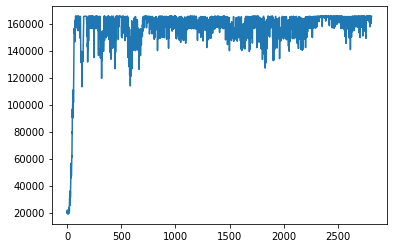

In [16]:
import matplotlib.pyplot as plt
plt.plot(rewards)
plt.show()

In [11]:
algo.save_weights("saved_models/PPO")

## test

In [12]:
# Pick algorithm to test
if(args.type=="DDQN"):
    algo = DDQN(action_dim, state_dim, args, is_eval=True)
elif(args.type=="A2C"):
    algo = A2C(action_dim, state_dim, args.consecutive_frames, is_eval=True)
elif(args.type=="PPO"):
    algo = PPO(action_dim, state_dim, args.consecutive_frames, is_eval=True)
elif(args.type=="A3C"):
    algo = A3C(action_dim, state_dim, args.consecutive_frames, is_atari=args.is_atari, is_eval=True)
elif(args.type=="DDPG"):
    algo = DDPG(action_dim, state_dim, act_range, args.consecutive_frames, is_eval=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 2)                 258       
Total params: 17,410
Trainable params: 17,410
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_

In [13]:
algo.load_weights("saved_models/PPO_LR_0.0001_actor.h5", "saved_models/PPO_LR_0.0001_critic.h5")

In [14]:
# Reset episode
num_test_int = 10
global_info = []

for i in range(num_test_int):
    time, cumul_reward, done = 0, 0, False
    old_state = env.reset_one()
    
    while not done:
        env.render()
        # Actor picks an action (following the policy)
        a = algo.policy_action(old_state)
        # Retrieve new state, reward, and whether the state is terminal
        new_state, r, done, _ = env.step_one(a)
        # Update current state
        old_state = new_state
        cumul_reward += r
        time += 1
        
        if done: 
            global_info.append({
                cumul_reward
            })

In [15]:
global_info

[{500.0},
 {500.0},
 {499.0},
 {485.0},
 {500.0},
 {500.0},
 {500.0},
 {462.0},
 {500.0},
 {454.0}]